----
# <p style='text-align: center;'> Telecom Churn Case Study </p>
----

 ### Problem Statement
 
  <font color = blue> <p> The telecommunications industry experiences an average of 15-25% annual churn rate 
 <font color = blue> <p> Customer retention has now become even more important than customer acquisition
 <font color = blue> <p> For many incumbent operators, retaining high profitable customers is the number one business goal.
 <font color = blue> <p> To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 <font color = blue> <p> analyse customer-level data of a churning telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
     

 ### Objective
 
 
 <font color = blue> <p> To build Logistic Regression model to select the churns that are most likely to convert into paying customers
 
 <font color = blue> <p> Model to be flexible in order to adjust to if the company's requirement changes in the future 

 The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

In [1]:
# import basic Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

## 1.  Data Import & Interpretation

In [3]:
#Import Data

churn = pd.read_csv("telecom_churn_data.csv")

churn.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Creating a copy for future usage


churn_original = churn.copy(deep=True)

### Data Interpretation

In [5]:
churn.shape

(99999, 226)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 2.  Data Preparation

In [8]:
### Handling Null Values

In [9]:
# Percentage of Null Values for every column

round( 100 * churn.isnull().sum() / len(churn), 2  ).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [10]:
#Delete the Features with Null values > 50%

for col in churn.columns:
    
    if churn[col].isnull().sum()/len(churn[col]) > 0.5:
        churn.drop(col, axis=1, inplace=True)

churn.shape

(99999, 186)

### As described in the Problem statement let create a new feature to identify high value customers

In [11]:
#Let us create a feature to calculate average recharge amount in the first two months : arpu_good_mnth

In [12]:
for col in churn.columns:
    if 'rech' in col:
        print(col)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9


In [13]:
churn['avg_rech_good_mnth'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2

In [14]:
X = churn['avg_rech_good_mnth'].quantile(0.7)
X

368.5

In [15]:
churn_hvalue = churn[churn.avg_rech_good_mnth >= X]
churn_hvalue

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_mnth
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00

In [16]:
#Deleting data for 9th Month

In [17]:
churn_hvalue['churn'] = np.where((churn_hvalue['total_ic_mou_9']==0) & (churn_hvalue['total_og_mou_9']==0) & (churn_hvalue['vol_2g_mb_9']==0) & (churn_hvalue['vol_3g_mb_9']==0), 1, 0)


In [18]:
churn_hvalue['churn'].value_counts(normalize=True)*100

churn
0    91.359835
1     8.640165
Name: proportion, dtype: float64

In [19]:
churn_hvalue.drop([col for col in churn_hvalue.columns if '_9' in col],axis=1, inplace=True)

In [20]:
round( 100 * churn_hvalue.isnull().sum() / len(churn_hvalue), 2  ).sort_values(ascending=False)

loc_og_t2c_mou_8        3.13
loc_og_t2m_mou_8        3.13
isd_og_mou_8            3.13
roam_og_mou_8           3.13
std_ic_t2o_mou_8        3.13
loc_og_t2t_mou_8        3.13
std_og_mou_8            3.13
std_ic_t2t_mou_8        3.13
std_og_t2c_mou_8        3.13
spl_og_mou_8            3.13
loc_og_t2f_mou_8        3.13
std_ic_t2f_mou_8        3.13
std_og_t2f_mou_8        3.13
loc_og_mou_8            3.13
std_og_t2m_mou_8        3.13
std_ic_t2m_mou_8        3.13
roam_ic_mou_8           3.13
std_og_t2t_mou_8        3.13
isd_ic_mou_8            3.13
std_ic_mou_8            3.13
loc_ic_mou_8            3.13
ic_others_8             3.13
onnet_mou_8             3.13
og_others_8             3.13
loc_ic_t2t_mou_8        3.13
loc_ic_t2f_mou_8        3.13
spl_ic_mou_8            3.13
offnet_mou_8            3.13
loc_ic_t2m_mou_8        3.13
date_of_last_rech_8     1.98
std_ic_t2t_mou_6        1.05
std_og_t2f_mou_6        1.05
std_og_t2c_mou_6        1.05
std_og_mou_6            1.05
std_ic_t2m_mou

In [21]:
#Handling the rows with Null values: As there are very low numbers of Nulls, those rows can be removed

for col in churn_hvalue.columns:
    churn_hvalue = churn_hvalue [~churn_hvalue[col].isnull()]
    
       

In [22]:
round( 100 * churn_hvalue.isnull().sum() / len(churn_hvalue), 2  ).sort_values(ascending=False)

mobile_number           0.0
circle_id               0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
std_ic_mou_8            0.0
std_ic_mou_7            0.0
std_ic_mou_6            0.0
std_ic_t2m_mou_6        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2o_mou_8        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
total_rech_amt_6    

In [23]:
churn_hvalue.shape

(28487, 144)

In [24]:
churn_hvalue['churn'].value_counts(normalize=True)*100

churn
0    93.846316
1     6.153684
Name: proportion, dtype: float64

In [25]:
round( 100 * churn_hvalue.isnull().sum() / len(churn_hvalue), 2  ).sort_values(ascending=False)

mobile_number           0.0
circle_id               0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
std_ic_mou_8            0.0
std_ic_mou_7            0.0
std_ic_mou_6            0.0
std_ic_t2m_mou_6        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2o_mou_8        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
total_rech_amt_6    

In [26]:
#Some of the columns have only one value, let's remove those

single_value_features =[]

for col in churn_hvalue.columns:
    if len(churn_hvalue[col].value_counts()) ==1:
        single_value_features.append(col)        
        print(col, churn_hvalue[col].value_counts(),"\n")

circle_id circle_id
109    28487
Name: count, dtype: int64 

loc_og_t2o_mou loc_og_t2o_mou
0.0    28487
Name: count, dtype: int64 

std_og_t2o_mou std_og_t2o_mou
0.0    28487
Name: count, dtype: int64 

loc_ic_t2o_mou loc_ic_t2o_mou
0.0    28487
Name: count, dtype: int64 

last_date_of_month_6 last_date_of_month_6
6/30/2014    28487
Name: count, dtype: int64 

last_date_of_month_7 last_date_of_month_7
7/31/2014    28487
Name: count, dtype: int64 

last_date_of_month_8 last_date_of_month_8
8/31/2014    28487
Name: count, dtype: int64 

std_og_t2c_mou_6 std_og_t2c_mou_6
0.0    28487
Name: count, dtype: int64 

std_og_t2c_mou_7 std_og_t2c_mou_7
0.0    28487
Name: count, dtype: int64 

std_og_t2c_mou_8 std_og_t2c_mou_8
0.0    28487
Name: count, dtype: int64 

std_ic_t2o_mou_6 std_ic_t2o_mou_6
0.0    28487
Name: count, dtype: int64 

std_ic_t2o_mou_7 std_ic_t2o_mou_7
0.0    28487
Name: count, dtype: int64 

std_ic_t2o_mou_8 std_ic_t2o_mou_8
0.0    28487
Name: count, dtype: int64 



In [27]:
single_value_features

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

### Dropping the columns without any analytical value

In [28]:
churn_hvalue.drop(single_value_features,axis=1,inplace=True)

In [29]:
churn_hvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_mnth,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.

In [30]:
churn_hvalue.shape

(28487, 131)

In [31]:
churn_hvalue.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [32]:
churn_hvalue.shape

(28487, 128)

## Three phases of the customer lifecycle :

The ‘good’ phase: customer is happy - Month 6

The ‘action’ phase:  customer experience starts to sore - Month 7 & 8

The ‘churn’ phase: customer is said to have churned - Month 9

Let us check the customer usage for following aspects

1. Minutes of Usage (mou) for good & action months and relative change
2. Data usage for good & action months and relative change
3. Recharge amount for good & action months and relative change
4. Number of Recharges for good & action months and relative change



### Minutes of Usage (mou) for good & action months and relative change

In [33]:
for col in churn_hvalue.columns:
    if "tot"  in col and "mou" in col:
        print(col)

total_og_mou_6
total_og_mou_7
total_og_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8


In [34]:
churn_hvalue['mou_good_monthly'] = churn_hvalue['total_og_mou_6'] + churn_hvalue['total_ic_mou_6']

In [35]:
# AS there are two months we must take average
churn_hvalue['mou_action_monthly'] = (churn_hvalue['total_og_mou_7'] + churn_hvalue['total_og_mou_8'] + churn_hvalue['total_ic_mou_7'] + churn_hvalue['total_ic_mou_8'])/2


In [36]:
churn_hvalue['mou_delta'] = churn_hvalue['mou_action_monthly'] - churn_hvalue['mou_good_monthly']

In [37]:
churn_hvalue['mou_downtrend'] = churn_hvalue['mou_delta'].apply(lambda x: 1 if x < 0 else 0)

In [38]:
churn_hvalue['mou_downtrend'].value_counts()

mou_downtrend
1    14460
0    14027
Name: count, dtype: int64

### Data usage for good & action months and relative change

In [39]:
for col in churn_hvalue.columns:
    if "mb" in col:
        print(col)

mobile_number
vol_2g_mb_6
vol_2g_mb_7
vol_2g_mb_8
vol_3g_mb_6
vol_3g_mb_7
vol_3g_mb_8


In [40]:
churn_hvalue['data_good_monthly'] = churn_hvalue['vol_2g_mb_6'] + churn_hvalue['vol_3g_mb_6']

In [41]:
# AS there are two months we must take average
churn_hvalue['data_action_monthly'] = (churn_hvalue['vol_2g_mb_7'] + churn_hvalue['vol_2g_mb_8'] + churn_hvalue['vol_3g_mb_7'] + churn_hvalue['vol_3g_mb_8'])/2


In [42]:
churn_hvalue['data_delta'] = churn_hvalue['data_action_monthly'] - churn_hvalue['data_good_monthly']

In [43]:
churn_hvalue['data_downtrend'] = churn_hvalue['data_delta'].apply(lambda x: 1 if x < 0 else 0)

In [44]:
churn_hvalue['data_downtrend'].value_counts()

data_downtrend
0    22799
1     5688
Name: count, dtype: int64

### Recharge amount for good & action months and relative change

In [45]:
for col in churn_hvalue.columns:
    if "total" in col and "rech_amt" in col:
        print(col)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8


In [46]:
churn_hvalue['rech_amt_good_monthly'] = churn_hvalue['total_rech_amt_6']

In [47]:
# AS there are two months we must take average
churn_hvalue['rech_amt_action_monthly'] = (churn_hvalue['total_rech_amt_7'] + churn_hvalue['total_rech_amt_8'])/2


In [48]:
churn_hvalue['rech_amt_delta'] = churn_hvalue['rech_amt_action_monthly'] - churn_hvalue['rech_amt_good_monthly']

In [49]:
churn_hvalue['rech_amt_downtrend'] = churn_hvalue['rech_amt_delta'].apply(lambda x: 1 if x < 0 else 0)

In [50]:
churn_hvalue['rech_amt_downtrend'].value_counts()

rech_amt_downtrend
1    15082
0    13405
Name: count, dtype: int64

### Number of Recharges for good & action months and relative change

In [51]:
for col in churn_hvalue.columns:
    if "total" in col and "rech_num" in col:
        print(col)

total_rech_num_6
total_rech_num_7
total_rech_num_8


In [52]:
churn_hvalue['rech_num_good_monthly'] = churn_hvalue['total_rech_num_6']

In [53]:
# AS there are two months we must take average
churn_hvalue['rech_num_action_monthly'] = (churn_hvalue['total_rech_num_7'] + churn_hvalue['total_rech_num_8'])/2


In [54]:
churn_hvalue['rech_num_delta'] = churn_hvalue['rech_num_action_monthly'] - churn_hvalue['rech_num_good_monthly']

In [55]:
churn_hvalue['rech_num_downtrend'] = churn_hvalue['rech_num_delta'].apply(lambda x: 1 if x < 0 else 0)

In [56]:
churn_hvalue['rech_num_downtrend'].value_counts()

rech_num_downtrend
1    16025
0    12462
Name: count, dtype: int64

In [57]:
### ARPU for good & action months and relative change

In [58]:
for col in churn_hvalue.columns:
    if "arpu" in col :
        print(col)

arpu_6
arpu_7
arpu_8


In [59]:
churn_hvalue['arpu_good_monthly'] = churn_hvalue['arpu_6']

In [60]:
# AS there are two months we must take average
churn_hvalue['arpu_action_monthly'] = (churn_hvalue['arpu_7'] + churn_hvalue['arpu_8'])/2


In [61]:
churn_hvalue['arpu_delta'] = churn_hvalue['arpu_action_monthly'] - churn_hvalue['arpu_good_monthly']

In [62]:
churn_hvalue['arpu_downtrend'] = churn_hvalue['arpu_delta'].apply(lambda x: 1 if x < 0 else 0)

In [63]:
churn_hvalue['arpu_downtrend'].value_counts()

arpu_downtrend
1    14857
0    13630
Name: count, dtype: int64

In [64]:
churn_hvalue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28487 entries, 7 to 99997
Columns: 148 entries, mobile_number to arpu_downtrend
dtypes: float64(114), int64(34)
memory usage: 32.4 MB


In [65]:
churn_hvalue

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_mnth,churn,mou_good_monthly,mou_action_monthly,mou_delta,mou_downtrend,data_good_monthly,data_action_monthly,data_delta,data_downtrend,rech_amt_good_monthly,rech_amt_action_monthly,rech_amt_delta,rech_amt_downtrend,rech_num_good_monthly,rech_num_action_monthly,rech_num_delta,rech_num_downtrend,arpu_good_monthly,arpu_action_monthly,arpu_delta,arpu_downtrend
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,0.00,0.000,0.000,0,1580,2214.0,634.0,0,5,6.0,1.0,0,1069.180,2260.6650,1191.4850,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,0.00,559.460,559.460,0,437,360.5,-76.5,1,19,17.5,-1.5,1,378.721,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00

##  Exploratory Data Analysis

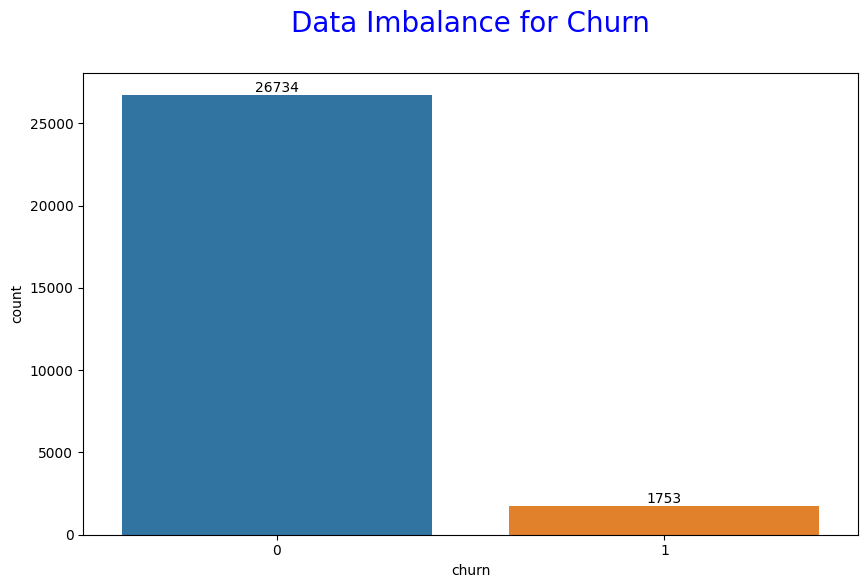

In [66]:
#Let us check for data imbalance for target column

fig, ax = plt.subplots(figsize=[10,6])

bars=sns.countplot(x='churn', data= churn_hvalue).set_title('Data Imbalance for Churn\n',color='blue',fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

In [67]:
#Data has significant imbalance

## EDA with the newly added columns


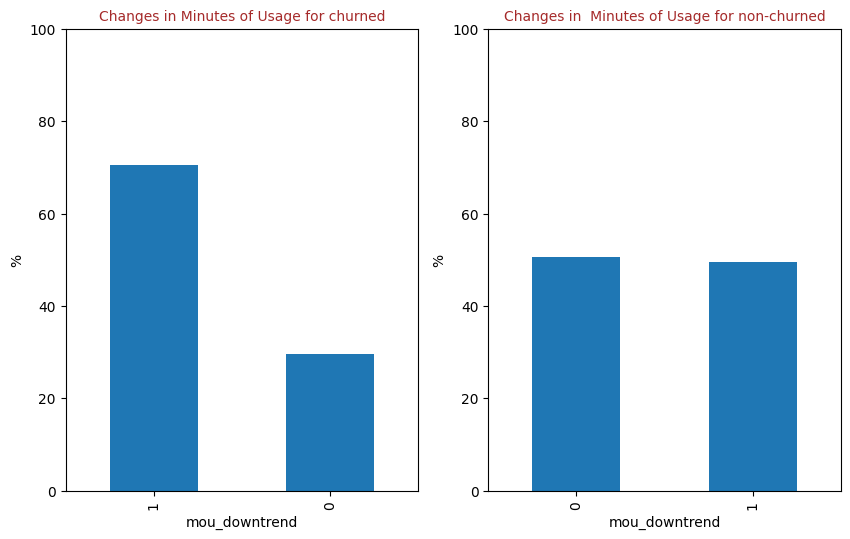

In [68]:
# Calculate the percentages for mou_downtrend
mou_downtrend_churn = churn_hvalue['mou_downtrend'][churn_hvalue['churn'] == 1].value_counts(normalize=True) * 100
mou_downtrend_nochurn = churn_hvalue['mou_downtrend'][churn_hvalue['churn'] == 0].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = mou_downtrend_churn.plot.bar()
ax.set_title('Changes in Minutes of Usage for churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = mou_downtrend_nochurn.plot.bar()
ax.set_title('Changes in  Minutes of Usage for non-churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Display the plot
plt.show()

In [69]:
# It is clear that for Churned customers there was reduction in minutes of usage from good period to action period

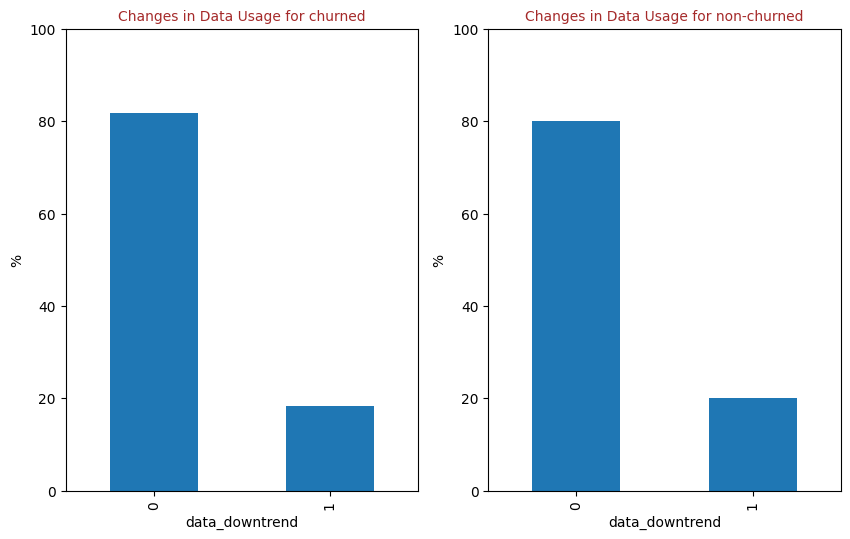

In [70]:
# Calculate the percentages for data_downtrend
data_downtrend_churn = churn_hvalue['data_downtrend'][churn_hvalue['churn'] == 1].value_counts(normalize=True) * 100
data_downtrend_nochurn = churn_hvalue['data_downtrend'][churn_hvalue['churn'] == 0].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = data_downtrend_churn.plot.bar()
ax.set_title('Changes in Data Usage for churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = data_downtrend_nochurn.plot.bar()
ax.set_title('Changes in Data Usage for non-churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Display the plot
plt.show()

In [71]:
# There is no impact of Data usage on the Churning

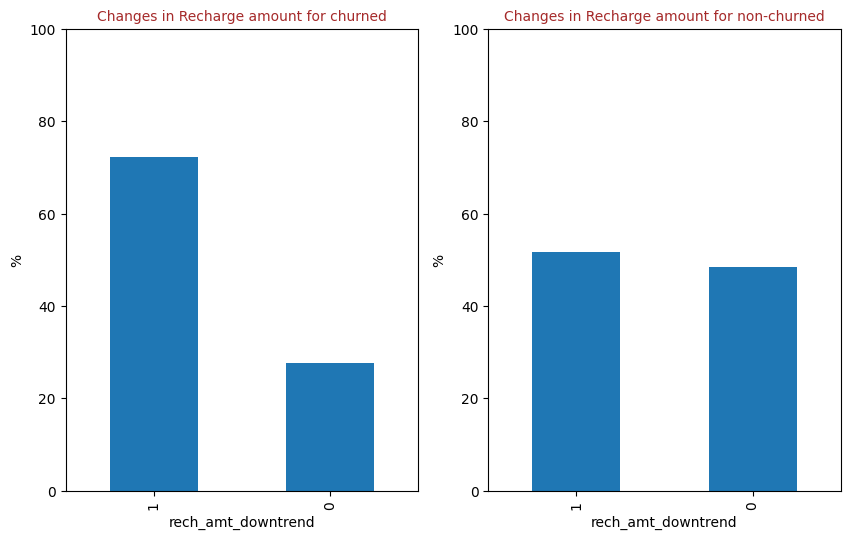

In [72]:
# Calculate the percentages for rech_amt_downtrend
rech_amt_downtrend_churn = churn_hvalue['rech_amt_downtrend'][churn_hvalue['churn'] == 1].value_counts(normalize=True) * 100
rech_amt_downtrend_nochurn = churn_hvalue['rech_amt_downtrend'][churn_hvalue['churn'] == 0].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = rech_amt_downtrend_churn.plot.bar()
ax.set_title('Changes in Recharge amount for churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = rech_amt_downtrend_nochurn.plot.bar()
ax.set_title('Changes in Recharge amount for non-churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Display the plot
plt.show()

In [73]:
# It is clear that for Churned customers there was reduction in recharge amount from good period to action period

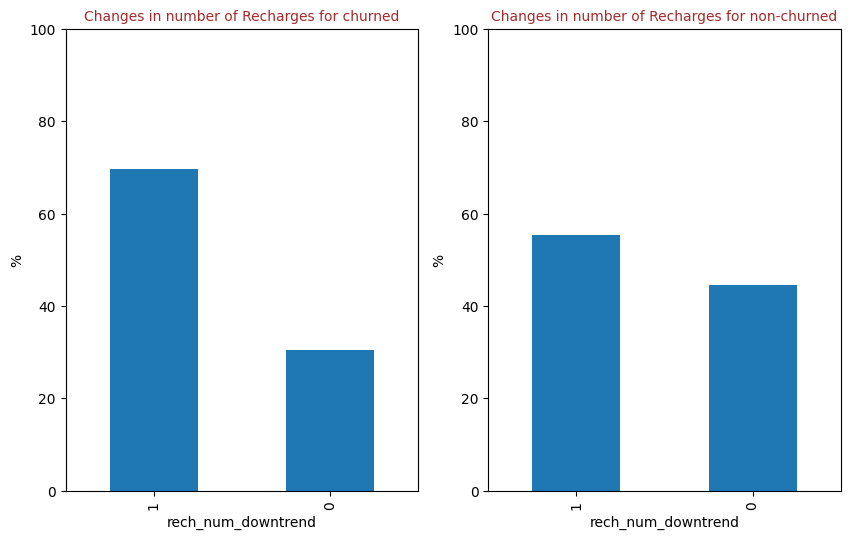

In [74]:
# Calculate the percentages for rech_num_downtrend
rech_num_downtrend_churn = churn_hvalue['rech_num_downtrend'][churn_hvalue['churn'] == 1].value_counts(normalize=True) * 100
rech_num_downtrend_nochurn = churn_hvalue['rech_num_downtrend'][churn_hvalue['churn'] == 0].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = rech_num_downtrend_churn.plot.bar()
ax.set_title('Changes in number of Recharges for churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = rech_num_downtrend_nochurn.plot.bar()
ax.set_title('Changes in number of Recharges for non-churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Display the plot
plt.show()

In [75]:
# It is clear that for Churned customers there was reduction in number of recharges from good period to action period

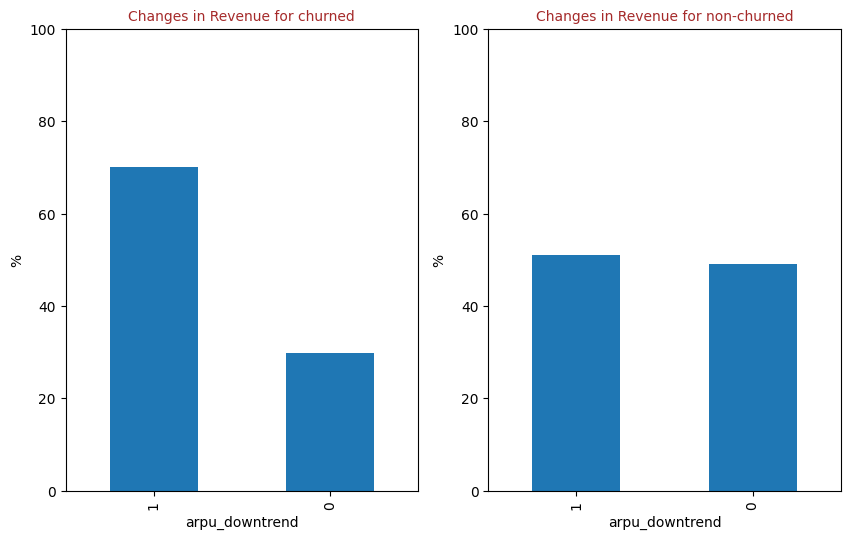

In [76]:
# Calculate the percentages for arpu_downtrend
arpu_downtrend_churn = churn_hvalue['arpu_downtrend'][churn_hvalue['churn'] == 1].value_counts(normalize=True) * 100
arpu_downtrend_nochurn = churn_hvalue['arpu_downtrend'][churn_hvalue['churn'] == 0].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = arpu_downtrend_churn.plot.bar()
ax.set_title('Changes in Revenue for churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = arpu_downtrend_nochurn.plot.bar()
ax.set_title('Changes in Revenue for non-churned', fontsize=10, color='brown')
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set the range of the y-axis

# Display the plot
plt.show()

In [77]:
# It is clear that for Churned customers there was reduction in average revenue from good period to action period

### EDA for original columns which has Impact

* Minutes of Usage
* Data Usage in MB
* Recharge Amount
* Number of Recharges
* Average Revenue per user

### Minutes of Usage

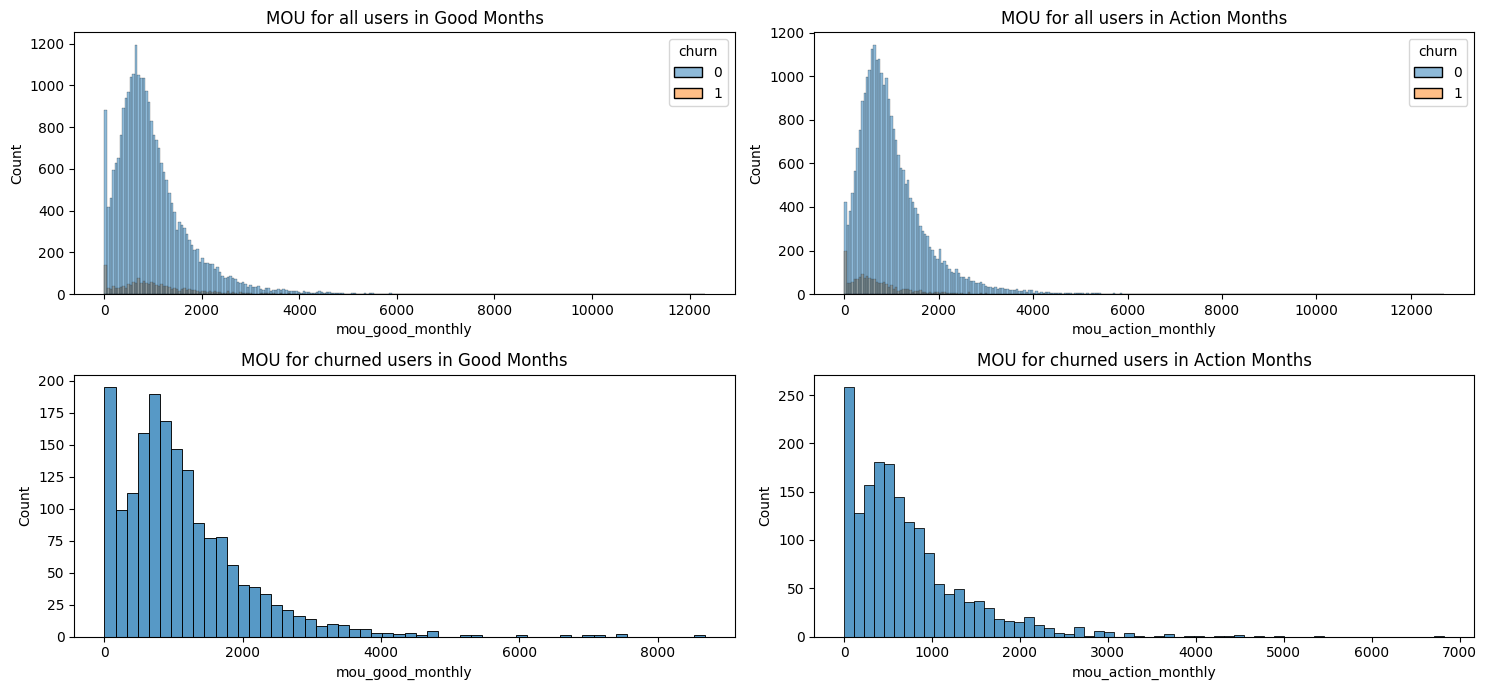

In [78]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sns.histplot(data=churn_hvalue, x='mou_good_monthly', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('MOU for all users in Good Months')

sns.histplot(data=churn_hvalue, x='mou_action_monthly', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('MOU for all users in Action Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='mou_good_monthly', ax=axes[1, 0])
axes[1, 0].set_title('MOU for churned users in Good Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='mou_action_monthly', ax=axes[1, 1])
axes[1, 1].set_title('MOU for churned users in Action Months')

plt.tight_layout()
plt.show()


### For churned customers minutes of usage is significantly reduced, those with no usage can be tagged

### Data Usage in MB

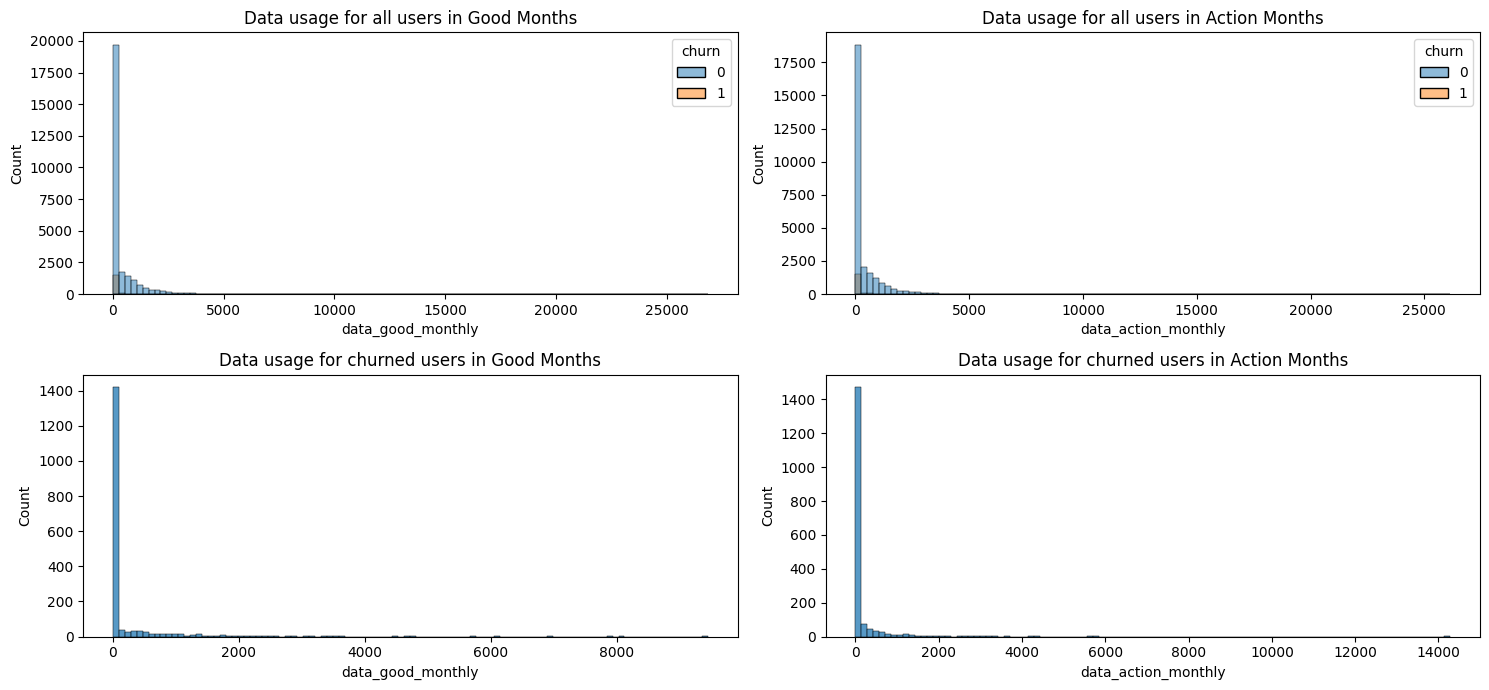

In [79]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sns.histplot(data=churn_hvalue, x='data_good_monthly', hue='churn', ax=axes[0, 0], bins =100)
axes[0, 0].set_title('Data usage for all users in Good Months')

sns.histplot(data=churn_hvalue, x='data_action_monthly', hue='churn', ax=axes[0, 1],bins =100)
axes[0, 1].set_title('Data usage for all users in Action Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='data_good_monthly', ax=axes[1, 0],bins =100)
axes[1, 0].set_title('Data usage for churned users in Good Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='data_action_monthly', ax=axes[1, 1],bins =100)
axes[1, 1].set_title('Data usage for churned users in Action Months')

plt.tight_layout()
plt.show()


### Most of the Churned users don't use data in both phases

### Recharge amt

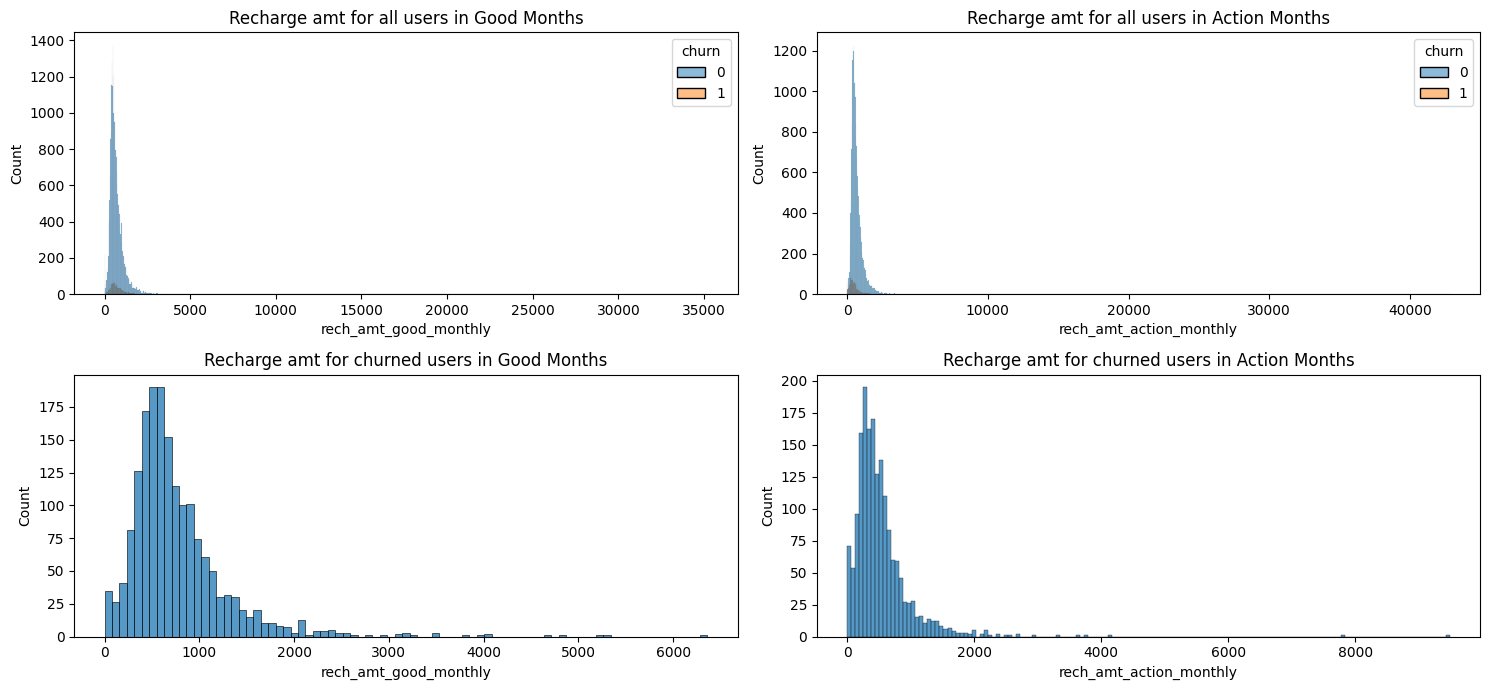

In [80]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sns.histplot(data=churn_hvalue, x='rech_amt_good_monthly', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('Recharge amt for all users in Good Months')

sns.histplot(data=churn_hvalue, x='rech_amt_action_monthly', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('Recharge amt for all users in Action Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='rech_amt_good_monthly', ax=axes[1, 0])
axes[1, 0].set_title('Recharge amt for churned users in Good Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='rech_amt_action_monthly', ax=axes[1, 1])
axes[1, 1].set_title('Recharge amt for churned users in Action Months')

plt.tight_layout()
plt.show()

### For most of the churned customers recharges are smaller than 1000 during action phase

In [81]:
### Number of recharges

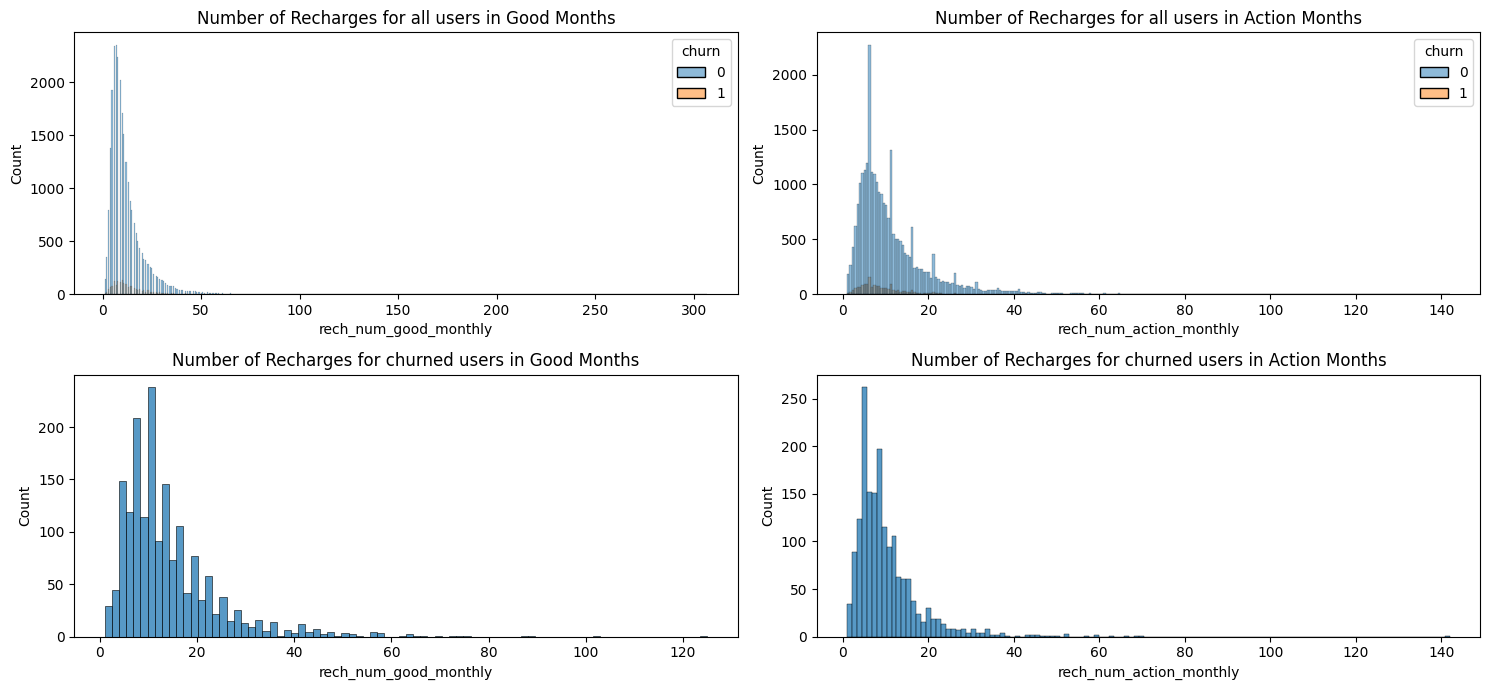

In [82]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sns.histplot(data=churn_hvalue, x='rech_num_good_monthly', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('Number of Recharges for all users in Good Months')

sns.histplot(data=churn_hvalue, x='rech_num_action_monthly', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('Number of Recharges for all users in Action Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='rech_num_good_monthly', ax=axes[1, 0])
axes[1, 0].set_title('Number of Recharges for churned users in Good Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='rech_num_action_monthly', ax=axes[1, 1])
axes[1, 1].set_title('Number of Recharges for churned users in Action Months')

plt.tight_layout()
plt.show()

### For most of the churned customers number of recharges are less than 15 during action phase

### Avg Revenue per user

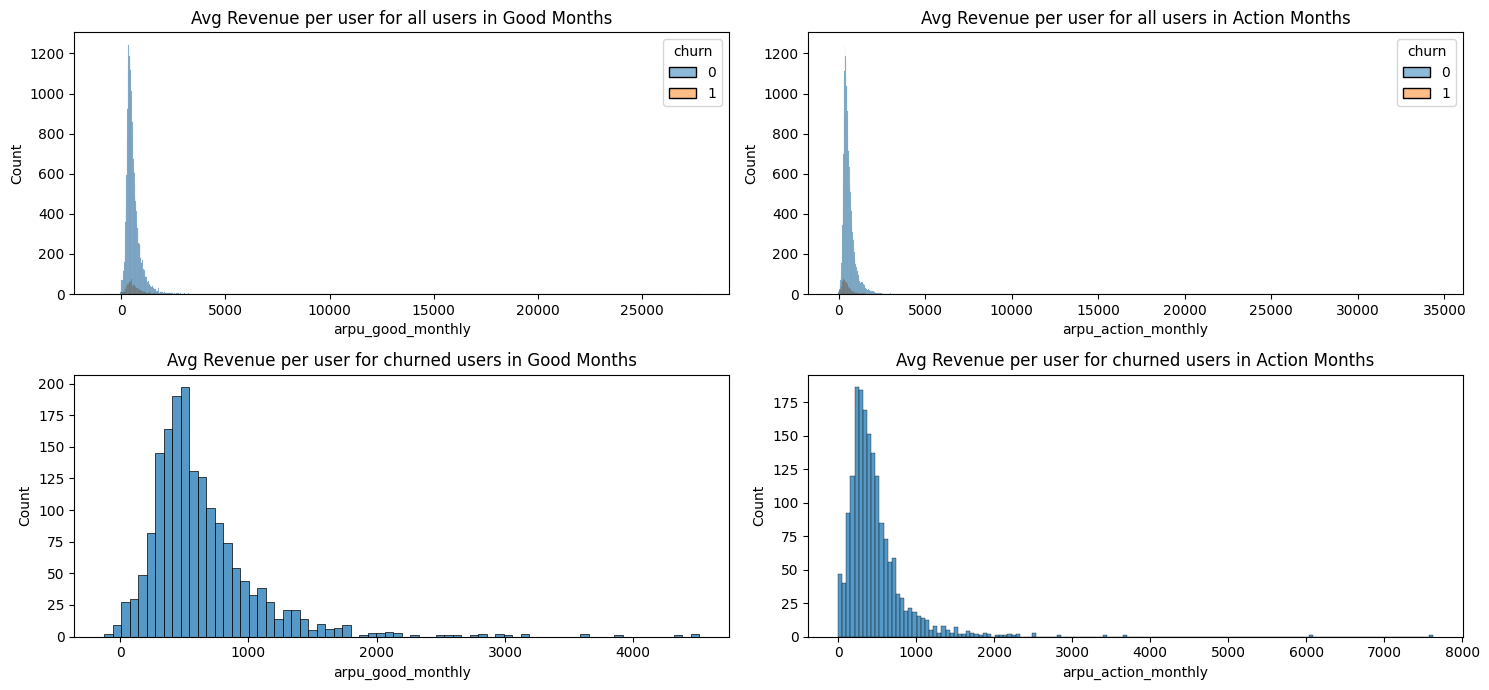

In [83]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sns.histplot(data=churn_hvalue, x='arpu_good_monthly', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('Avg Revenue per user for all users in Good Months')

sns.histplot(data=churn_hvalue, x='arpu_action_monthly', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('Avg Revenue per user for all users in Action Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='arpu_good_monthly', ax=axes[1, 0])
axes[1, 0].set_title('Avg Revenue per user for churned users in Good Months')

sns.histplot(data=churn_hvalue[churn_hvalue.churn == 1], x='arpu_action_monthly', ax=axes[1, 1])
axes[1, 1].set_title('Avg Revenue per user for churned users in Action Months')

plt.tight_layout()
plt.show()

### For churned customers there is significant reduction in revenue during action phase

### Before the split remove newly created features

In [84]:
churn_hvalue.drop(['mou_good_monthly','mou_action_monthly', 'mou_delta','mou_downtrend', 'data_good_monthly','data_action_monthly','data_delta','data_downtrend',
'rech_amt_good_monthly','rech_amt_action_monthly','rech_amt_delta','rech_amt_downtrend','rech_num_good_monthly','rech_num_action_monthly',
'rech_num_delta','rech_num_downtrend','arpu_good_monthly','arpu_action_monthly','arpu_delta','arpu_downtrend','avg_rech_good_mnth'], axis=1,inplace=True)



In [85]:
churn_hvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,31

In [86]:
churn_hvalue.shape

(28487, 127)

## Train Test Split

In [87]:
# Import library
from sklearn.model_selection import train_test_split

In [88]:
# Putting feature variables into X
X = churn_hvalue.drop(['mobile_number','churn'], axis=1)

In [89]:
# Putting target variable to y
y = churn_hvalue['churn']

In [90]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=23)

## Dealing with data imbalance

In [91]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [92]:
# Instantiate SMOTE
sm = SMOTE(random_state=23)

In [93]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [94]:
len(X_train)

37318

## Feature Scaling

In [95]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
num_cols = X_train.columns.to_list()

In [98]:

# Fit the data into scaler and transform

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [99]:

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.092279,0.027811,-0.388082,0.057518,0.131545,-0.023179,-0.534172,-0.667295,-0.572567,0.137301,-0.220909,2.360131,0.289249,-0.290114,0.773405,0.178683,0.167736,-0.057678,-0.211709,-0.299793,-0.539664,-0.010568,-0.080609,-0.273776,0.215828,0.266075,-0.245504,-0.018694,-0.092291,-0.391481,-0.106699,0.099718,-0.269029,-0.466903,-0.519255,-0.384920,-0.150439,-0.142587,-0.134569,-0.402266,-0.307617,-0.441289,-0.057760,-0.051990,-0.042861,-0.163477,-0.192882,-0.299512,-0.335854,-0.02234,-0.021393,-0.406554,-0.345720,-0.593231,0.104866,0.602190,-0.157554,-0.158021,-0.338599,-0.483755,-0.311233,-0.121608,-0.278975,-0.106297,0.066150,-0.451908,-0.103642,-0.130914,-0.184115,-0.356238,-0.302751,-0.226061,0.90664,5.432809,0.168220,-0.187925,0.377034,-0.241349,-0.201845,0.168338,-0.501372,-0.371974,-0.109732,-0.164666,-0.192294,-0.172346,-0.147778,-0.102489,-0.112450,-0.096856,-0.625243,-0.706198,-0.575450,-0.007438,-0.069040,-0.203343,0.673765,0.595180,-0.040075,0.218163,1.338413,0.459237,0.688125,1.579505,0.175600,0.905621,0.664078,0.107821,-0.250044,-0.256998,-0.238338,-0.268925,0.302714,-0.273683,2.016184,1.828321,-0.220574,-0.140232,-0.147044,1.285251,1.089884,-0.268926,-0.28753,0.113783,-0.099432
1,0.624047,0.383707,0.303630,-0.030715,0.131208,1.183452,0.010965,-0.205482,0.090556,-0.231249,-0.220909,-0.262575,-0.259334,-0.290114,-0.283141,0.490113,0.242620,0.134456,0.652475,0.584948,0.733530,-0.189959,-0.244971,-0.146756,-0.224177,-0.276707,0.481447,0.715822,0.515826,0.540999,-0.214744,0.066148,1.334605,-0.200601,-0.428476,-0.208316,0.298768,1.531201,-0.134569,-0.286404,-0.239786,0.742010,-0.057760,-0.051990,-0.042861,-0.338509,-0.376295,-0.056176,-0.335854,-0.02234,-0.021393,0.037892,-0.010926,0.913990,0.194227,0.112485,-0.048876,0.219370,0.312086,0.220384,-0.263906,-0.284662,-0.278975,0.211083,0.230930,0.094557,-0.139829,0.006692,-0.124734,-0.029624,0.577619,-0.128787,-0.14415,0.663324,-0.118206,-0.130247,0.473980,-0.176190,0.185297,0.464266,0.012158,2.546710,-0.109732,1.443769,0.161661,0.381556,-0.011310,0.990753,0.409480,-0.086050,0.027095,-0.141517,0.294462,0.659791,0.323313,0.400543,0.177581,0.595180,-0.040075,-0.794757,0.150005,0.459237,7.969851,3.303905,-0.213264,-0.

In [100]:
# Transform the test set
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
43675,2.159320,2.820225,2.536588,-0.207125,-0.417956,-0.247034,0.387102,0.382862,1.397261,0.158456,-0.220909,-0.262575,-0.010498,-0.290114,-0.283141,0.777491,0.241281,0.303576,1.763867,1.976577,3.489016,4.073623,4.251607,5.114037,-0.224177,-0.276707,2.460720,1.896179,1.695933,2.658051,-0.530308,-0.521532,-0.402836,-0.543460,-0.542879,-0.418995,-0.150439,-0.142587,-0.134569,-0.753252,-0.742195,-0.553120,-0.05776,-0.05199,-0.042861,-0.338509,-0.376295,0.606357,-0.335854,-0.02234,-0.021393,0.127051,0.040011,0.858674,0.739450,0.051578,0.385999,0.815677,1.389630,1.731058,1.052777,1.030441,1.234292,1.071398,1.129292,1.565275,-0.209490,-0.205603,-0.187395,-0.376481,-0.325551,-0.267403,-0.144150,0.114342,0.316560,-0.398358,-0.335066,-0.254327,0.723182,0.810715,1.207182,-0.371974,-0.109732,-0.164666,-0.192294,-0.172346,-0.147778,-0.102489,-0.112450,-0.096856,-0.407797,-0.480326,-0.078358,2.011357,3.199339,2.110962,1.666133,1.904505,2.332616,2.564762,3.070810,3.374381,1.401275,-0.095668,0.014842,0.782862,2.059882,2.119105,3.167957,-0.256998,-0.238338,-0.268925,-0.276900,-0.273683,-0.241308,3.893247,2.022920,-0.140232,-0.147044,-0.122114,0.157556,4.475509,4.181265,3.194466,-0.099432
87688,2.243684,2.104667,2.231825,0.029298,-0.093782,-0.225957,2.919514,2.317611,1.204078,-0.231249,3.384487,12.105092,-0.259334,1.361759,2.871283,-0.327061,-0.362391,-0.305979,-0.308610,-0.349707,-0.372652,2.698148,1.676281,0.825999,-0.224177,-0.276707,-0.245504,-0.220873,-0.349843,-0.386172,0.205578,-0.106693,-0.205784,3.149481,2.321853,0.543764,0.907470,1.321387,-0.110147,2.350637,1.613848,0.230031,-0.05776,-0.05199,-0.042861,0.151472,-0.355703,-0.009421,-0.335854,-0.02234,-0.021393,2.174425,1.378556,0.005152,-0.419679,-0.347032,-0.345913,0.529968,0.665672,-0.270454,3.127244,0.956734,1.131167,0.609952,0.413866,-0.200769,1.593098,1.080429,0.776853,33.815658,15.533546,4.652356,-0.046586,-0.136350,1.444491,22.638961,11.119451,4.044463,9.669109,4.622188,1.271972,-0.371974,-0.109732,-0.164666,-0.192294,-0.172346,-0.147778,-0.102489,-0.112450,-0.096856,1.005602,0.536101,0.418735,2.397247,0.584265,2.075440,2.801239,0.266267,1.035545,3.974409,0.150005,1.003398,2.032126,0.833504,2.113045,0.013607,-0.184659,0.

In [101]:
X_train_rf  = X_train.copy(deep=True) 

In [102]:
y_train_rf =  y_train.copy(deep=True) 

In [103]:
X_test_rf = X_test.copy(deep=True)

## Building Model

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [105]:
logreg = LogisticRegression(random_state=42)

### Recursive Feature Elimination - RFE

In [106]:
rfe = RFE(estimator=logreg, n_features_to_select=25)

In [107]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=25)

In [108]:
rfe.ranking_

array([100,   1,   1,  22,  76,  35,  14,  21,   1,  87,  74,  47,  38,
        15,   1,  37,  39,   1,  82,   7,  68,  12,  11,  70,  85,  98,
        32,  92,  77,  69,  36,  40,  33,  13,  83,   1,  75,  64,  63,
        42,  10,   1,  18,  50,  17,  99,  78,  31,  80,  46,  91,  84,
         1,  34,  88,  96,  71,  43,   3,   4,  59,  58, 101,  94,   1,
         1,   9,  24,   8,  55,  65,  29,  90,  57,  67,  56,  97,  72,
        89,  25,   1,  44,  45,  20,  28,  66,  73,  81,  53,  54,  49,
        30,   1,  51,   1,   1,  19,  95,  16,  79,  62,   1,  41,   2,
        48,   1,   5,  23,   1,   1,   1,  61,  60,   1,   1,   6,   1,
        27,  86,   1,   1,  26,  52,  93,   1])

In [109]:
X_train.columns[rfe.support_]

Index(['arpu_7', 'arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_7', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'sep_vbc_3g'],
      dtype='object')

In [110]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(37318, 25)

In [111]:
X_train2.columns

Index(['arpu_7', 'arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_7', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'sep_vbc_3g'],
      dtype='object')

In [112]:
rfe_col = X_train.columns[rfe.support_]

In [113]:
# Building model with RFE selected features

X_train_sm = sm.add_constant(X_train[rfe_col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37318
Model:                            GLM   Df Residuals:                    37292
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15322.
Date:                Sat, 12 Aug 2023   Deviance:                       30643.
Time:                        10:29:18   Pearson chi2:                 3.98e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4317
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4077      0.019    -21.903      0.000      -0.444      -0.371
arpu_7                 0.7245      0.068     10.625      0.000       0.591       0.858
arpu_8                 0.6675      0.086      7.726      0.000       0.498       0.837
offnet_mou_8          -1.5286      0.065    -23.441      0.000      -1.656      -1.401
roam_og_mou_8          0.6762      0.025     26.669      0.000       0.626       0.726
loc_og_t2t_mou_8      -0.5382      0.034    -15.705      0.000      -0.605      -0.471
std_og_t2m_mou_8       1.3211      0.061     21.528      0.000       1.201       1.441
std_og_mou_8          -0.7898      0.037    -21.580      0.000      -0.862      -0.718
total_og_mou_7         0.5139      0.033     15.344      0.000       0.448       0.580
loc_ic_mou_7           0.6620      0.037     17.812      0.000       0.589       0.735
loc_ic_mou_8          -0.7097      0.066    -10.678      0.000      -0.840      -0.579
total_ic_mou_8        -0.4805      0.049     -9.798      0.000      -0.577      -0.384
total_rech_num_8      -0.5204      0.022    -23.280      0.000      -0.564      -0.477
total_rech_amt_7      -0.4350      0.064     -6.769      0.000      -0.561      -0.309
total_rech_amt_8      -0.4313      0.085     -5.080      0.000      -0.598      -0.265
last_day_rch_amt_8    -0.5843      0.027    -21.712      0.000      -0.637      -0.532
vol_3g_mb_6            0.4969      0.028     17.608      0.000       0.442       0.552
monthly_2g_6          -0.4281      0.029    -14.700      0.000      -0.485      -0.371
monthly_2g_7          -0.2550      0.026     -9.649      0.000      -0.307      -0.203
monthly_2g_8          -0.5479      0.036    -15.374      0.000      -0.618      -0.478
sachet_2g_8           -0.3733      0.023    -16.503      0.000      -0.418      -0.329
monthly_3g_6          -0.4477      0.029    -15.340      0.000      -0.505      -0.390
monthly_3g_8          -0.7390      0.038    -19.377      0.000      -0.814      -0.664
sachet_3g_8           -0.3365      0.033    -10.097      0.000      -0.402      -0.271
aon                   -0.3570      0.016    -22.289      0.000      -0.388      -0.326
sep_vbc_3g            -0.6342      0.062    -10.185      0.000      -0.756      -0.512
======================================================================================
"""

In [114]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.635665,1
1,0,0.005671,0
2,0,0.013161,0
3,0,0.698108,1
4,0,0.486904,0


In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14965  3694]
 [ 2618 16041]]

Accuracy : 0.8308591028458117


In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,21.28
13,total_rech_amt_8,20.01
0,arpu_7,15.89
12,total_rech_amt_7,14.30
9,loc_ic_mou_8,8.34
5,std_og_t2m_mou_8,8.32
2,offnet_mou_8,7.80
10,total_ic_mou_8,5.99
6,std_og_mou_8,4.34
7,total_og_mou_7,3.09


In [117]:
rfe_col = rfe_col.drop('arpu_8', 1)

In [118]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37318
Model:                            GLM   Df Residuals:                    37293
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15352.
Date:                Sat, 12 Aug 2023   Deviance:                       30704.
Time:                        10:29:26   Pearson chi2:                 7.83e+12
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4308
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4005      0.019    -21.628      0.000      -0.437      -0.364
arpu_7                 0.6501      0.067      9.745      0.000       0.519       0.781
offnet_mou_8          -1.4276      0.064    -22.449      0.000      -1.552      -1.303
roam_og_mou_8          0.6767      0.025     26.655      0.000       0.627       0.726
loc_og_t2t_mou_8      -0.5146      0.034    -15.134      0.000      -0.581      -0.448
std_og_t2m_mou_8       1.2331      0.060     20.545      0.000       1.116       1.351
std_og_mou_8          -0.7270      0.036    -20.215      0.000      -0.797      -0.656
total_og_mou_7         0.4636      0.033     14.037      0.000       0.399       0.528
loc_ic_mou_7           0.6620      0.037     17.849      0.000       0.589       0.735
loc_ic_mou_8          -0.7304      0.066    -11.053      0.000      -0.860      -0.601
total_ic_mou_8        -0.4504      0.048     -9.288      0.000      -0.545      -0.355
total_rech_num_8      -0.5190      0.022    -23.191      0.000      -0.563      -0.475
total_rech_amt_7      -0.2693      0.060     -4.511      0.000      -0.386      -0.152
total_rech_amt_8       0.1171      0.046      2.540      0.011       0.027       0.207
last_day_rch_amt_8    -0.5937      0.027    -22.108      0.000      -0.646      -0.541
vol_3g_mb_6            0.4977      0.028     17.621      0.000       0.442       0.553
monthly_2g_6          -0.4303      0.029    -14.785      0.000      -0.487      -0.373
monthly_2g_7          -0.2596      0.026     -9.828      0.000      -0.311      -0.208
monthly_2g_8          -0.5432      0.036    -15.278      0.000      -0.613      -0.474
sachet_2g_8           -0.3771      0.023    -16.633      0.000      -0.422      -0.333
monthly_3g_6          -0.4434      0.029    -15.152      0.000      -0.501      -0.386
monthly_3g_8          -0.7283      0.039    -18.903      0.000      -0.804      -0.653
sachet_3g_8           -0.3352      0.033    -10.091      0.000      -0.400      -0.270
aon                   -0.3523      0.016    -22.078      0.000      -0.384      -0.321
sep_vbc_3g            -0.6063      0.060    -10.176      0.000      -0.723      -0.490
======================================================================================
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,15.52
11,total_rech_amt_7,12.91
8,loc_ic_mou_8,8.34
4,std_og_t2m_mou_8,8.13
1,offnet_mou_8,7.55
9,total_ic_mou_8,5.97
12,total_rech_amt_8,4.93
5,std_og_mou_8,4.19
6,total_og_mou_7,2.99
7,loc_ic_mou_7,2.95


In [120]:
rfe_col = rfe_col.drop('arpu_7', 1)

In [121]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37318
Model:                            GLM   Df Residuals:                    37294
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15401.
Date:                Sat, 12 Aug 2023   Deviance:                       30802.
Time:                        10:29:33   Pearson chi2:                 1.10e+12
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4293
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4002      0.018    -21.636      0.000      -0.436      -0.364
offnet_mou_8          -1.4630      0.063    -23.313      0.000      -1.586      -1.340
roam_og_mou_8          0.6632      0.025     26.325      0.000       0.614       0.713
loc_og_t2t_mou_8      -0.5528      0.034    -16.228      0.000      -0.620      -0.486
std_og_t2m_mou_8       1.2612      0.059     21.212      0.000       1.145       1.378
std_og_mou_8          -0.8109      0.035    -23.275      0.000      -0.879      -0.743
total_og_mou_7         0.5721      0.031     18.381      0.000       0.511       0.633
loc_ic_mou_7           0.6760      0.037     18.236      0.000       0.603       0.749
loc_ic_mou_8          -0.7526      0.066    -11.403      0.000      -0.882      -0.623
total_ic_mou_8        -0.4428      0.048     -9.160      0.000      -0.537      -0.348
total_rech_num_8      -0.5157      0.022    -23.100      0.000      -0.559      -0.472
total_rech_amt_7       0.2271      0.029      7.822      0.000       0.170       0.284
total_rech_amt_8       0.2619      0.042      6.181      0.000       0.179       0.345
last_day_rch_amt_8    -0.6047      0.027    -22.456      0.000      -0.658      -0.552
vol_3g_mb_6            0.5030      0.028     18.027      0.000       0.448       0.558
monthly_2g_6          -0.4266      0.029    -14.675      0.000      -0.484      -0.370
monthly_2g_7          -0.2535      0.026     -9.627      0.000      -0.305      -0.202
monthly_2g_8          -0.5510      0.036    -15.503      0.000      -0.621      -0.481
sachet_2g_8           -0.3806      0.023    -16.830      0.000      -0.425      -0.336
monthly_3g_6          -0.4274      0.029    -14.834      0.000      -0.484      -0.371
monthly_3g_8          -0.7363      0.038    -19.195      0.000      -0.812      -0.661
sachet_3g_8           -0.3362      0.033    -10.124      0.000      -0.401      -0.271
aon                   -0.3543      0.016    -22.243      0.000      -0.386      -0.323
sep_vbc_3g            -0.5779      0.060     -9.597      0.000      -0.696      -0.460
======================================================================================
"""

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,8.33
3,std_og_t2m_mou_8,8.07
0,offnet_mou_8,7.46
8,total_ic_mou_8,5.97
11,total_rech_amt_8,4.27
4,std_og_mou_8,4.01
6,loc_ic_mou_7,2.95
10,total_rech_amt_7,2.85
5,total_og_mou_7,2.72
18,monthly_3g_6,2.18


In [123]:
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [124]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37318
Model:                            GLM   Df Residuals:                    37295
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15464.
Date:                Sat, 12 Aug 2023   Deviance:                       30929.
Time:                        10:29:41   Pearson chi2:                 1.41e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4274
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3888      0.018    -21.117      0.000      -0.425      -0.353
offnet_mou_8          -1.6100      0.062    -25.929      0.000      -1.732      -1.488
roam_og_mou_8          0.7026      0.025     27.878      0.000       0.653       0.752
loc_og_t2t_mou_8      -0.6081      0.034    -17.660      0.000      -0.676      -0.541
std_og_t2m_mou_8       1.4021      0.059     23.875      0.000       1.287       1.517
std_og_mou_8          -0.8474      0.035    -24.233      0.000      -0.916      -0.779
total_og_mou_7         0.6092      0.031     19.463      0.000       0.548       0.671
loc_ic_mou_7           0.4422      0.029     15.122      0.000       0.385       0.500
total_ic_mou_8        -0.8682      0.039    -22.446      0.000      -0.944      -0.792
total_rech_num_8      -0.5234      0.022    -23.479      0.000      -0.567      -0.480
total_rech_amt_7       0.2433      0.029      8.322      0.000       0.186       0.301
total_rech_amt_8       0.2728      0.043      6.386      0.000       0.189       0.357
last_day_rch_amt_8    -0.6048      0.027    -22.376      0.000      -0.658      -0.552
vol_3g_mb_6            0.5146      0.028     18.366      0.000       0.460       0.569
monthly_2g_6          -0.4304      0.029    -14.799      0.000      -0.487      -0.373
monthly_2g_7          -0.2503      0.026     -9.505      0.000      -0.302      -0.199
monthly_2g_8          -0.5499      0.035    -15.499      0.000      -0.619      -0.480
sachet_2g_8           -0.3782      0.023    -16.802      0.000      -0.422      -0.334
monthly_3g_6          -0.4327      0.029    -15.029      0.000      -0.489      -0.376
monthly_3g_8          -0.7458      0.039    -19.348      0.000      -0.821      -0.670
sachet_3g_8           -0.3470      0.033    -10.444      0.000      -0.412      -0.282
aon                   -0.3619      0.016    -22.829      0.000      -0.393      -0.331
sep_vbc_3g            -0.5781      0.061     -9.510      0.000      -0.697      -0.459
======================================================================================
"""

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2m_mou_8,7.87
0,offnet_mou_8,7.25
10,total_rech_amt_8,4.27
4,std_og_mou_8,4.01
9,total_rech_amt_7,2.84
5,total_og_mou_7,2.72
7,total_ic_mou_8,2.49
6,loc_ic_mou_7,2.21
17,monthly_3g_6,2.18
12,vol_3g_mb_6,1.93


In [126]:
rfe_col = rfe_col.drop('std_og_t2m_mou_8', 1)

In [127]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37318
Model:                            GLM   Df Residuals:                    37296
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15801.
Date:                Sat, 12 Aug 2023   Deviance:                       31602.
Time:                        10:29:47   Pearson chi2:                 1.23e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4169
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3874      0.018    -21.324      0.000      -0.423      -0.352
offnet_mou_8          -0.3053      0.024    -12.914      0.000      -0.352      -0.259
roam_og_mou_8          0.5357      0.024     22.253      0.000       0.488       0.583
loc_og_t2t_mou_8      -0.6332      0.037    -17.215      0.000      -0.705      -0.561
std_og_mou_8          -0.4206      0.028    -14.934      0.000      -0.476      -0.365
total_og_mou_7         0.4655      0.030     15.528      0.000       0.407       0.524
loc_ic_mou_7           0.3999      0.030     13.490      0.000       0.342       0.458
total_ic_mou_8        -1.0554      0.039    -26.874      0.000      -1.132      -0.978
total_rech_num_8      -0.5318      0.022    -24.109      0.000      -0.575      -0.489
total_rech_amt_7       0.3266      0.030     10.994      0.000       0.268       0.385
total_rech_amt_8      -0.0764      0.039     -1.956      0.050      -0.153       0.000
last_day_rch_amt_8    -0.6198      0.027    -22.909      0.000      -0.673      -0.567
vol_3g_mb_6            0.5171      0.028     18.202      0.000       0.461       0.573
monthly_2g_6          -0.4293      0.029    -14.815      0.000      -0.486      -0.373
monthly_2g_7          -0.2712      0.026    -10.283      0.000      -0.323      -0.219
monthly_2g_8          -0.5182      0.035    -14.683      0.000      -0.587      -0.449
sachet_2g_8           -0.3821      0.023    -16.971      0.000      -0.426      -0.338
monthly_3g_6          -0.4307      0.029    -14.872      0.000      -0.487      -0.374
monthly_3g_8          -0.7021      0.038    -18.412      0.000      -0.777      -0.627
sachet_3g_8           -0.3286      0.034     -9.686      0.000      -0.395      -0.262
aon                   -0.4049      0.015    -26.135      0.000      -0.435      -0.375
sep_vbc_3g            -0.5484      0.059     -9.249      0.000      -0.665      -0.432
======================================================================================
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,3.90
3,std_og_mou_8,2.85
8,total_rech_amt_7,2.81
4,total_og_mou_7,2.64
6,total_ic_mou_8,2.42
5,loc_ic_mou_7,2.20
16,monthly_3g_6,2.18
0,offnet_mou_8,2.13
11,vol_3g_mb_6,1.93
13,monthly_2g_7,1.75


In [129]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.545788,1
1,0,0.009492,0
2,0,0.027041,0
3,0,0.663997,1
4,0,0.565609,1


In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14837  3822]
 [ 2795 15864]]

Accuracy : 0.8226861032209658


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the Recall of our logistic regression model
TP / float(TP+FN)

0.8502063347446273

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.7951658716973042

In [134]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20483412830269576


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.8058518744285279


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8414813974591652


In [137]:
### Plotting ROC

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None
    

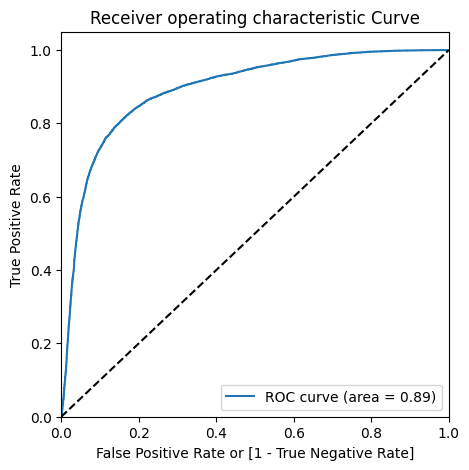

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [140]:
### Optimal cutoff point¶



In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.545788,1,1,1,1,1,1,1,0,0,0,0
1,0,0.009492,0,1,0,0,0,0,0,0,0,0,0
2,0,0.027041,0,1,0,0,0,0,0,0,0,0,0
3,0,0.663997,1,1,1,1,1,1,1,1,0,0,0
4,0,0.565609,1,1,1,1,1,1,1,0,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.676671  0.975615  0.377727
0.2   0.2  0.727772  0.949944  0.505601
0.3   0.3  0.770432  0.921486  0.619379
0.4   0.4  0.802160  0.890616  0.713704
0.5   0.5  0.822686  0.850206  0.795166
0.6   0.6  0.825929  0.790932  0.860925
0.7   0.7  0.806287  0.697465  0.915108
0.8   0.8  0.743663  0.532183  0.955142
0.9   0.9  0.593038  0.202744  0.983332


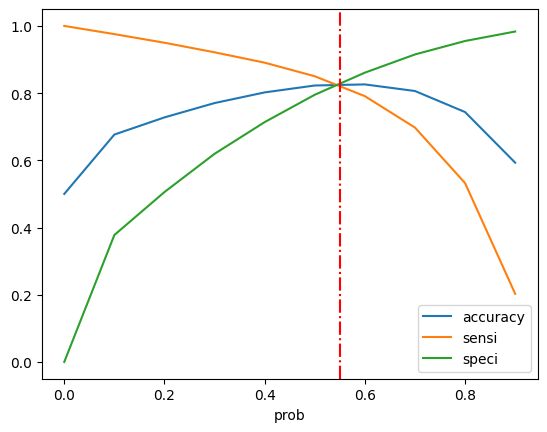

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.55, color='r', linestyle='-.') # additing axline
ax.grid(True)
plt.show()

In [144]:
# cutoff = 0.55

In [145]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
43675,0,0.007858,0
87688,0,0.335558,0
20867,1,0.691184,1
44786,0,0.044873,0
17421,0,0.015527,0


In [146]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6659 1416]
 [ 140  332]]

Accuracy : 0.8179478179478179


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['predicted']))

# Sensitivity
print("Recall:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8179478179478179
Recall:- 0.7033898305084746
Specificity:- 0.8246439628482972


In [149]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:10]

total_ic_mou_8        1.055350
monthly_3g_8          0.702145
loc_og_t2t_mou_8      0.633161
last_day_rch_amt_8    0.619815
sep_vbc_3g            0.548365
roam_og_mou_8         0.535675
total_rech_num_8      0.531826
monthly_2g_8          0.518164
vol_3g_mb_6           0.517060
total_og_mou_7        0.465544
dtype: float64


### Logistic Regression


#### Accuracy = 0.82
#### Recall = 0.70

## Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)


In [152]:
# Instantiate SMOTE
sm = SMOTE(random_state=23)

In [153]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [154]:
# Initial classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=10)


In [155]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [156]:
# Train Accuracy
y_train_pred = dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

Train accuracy : 0.9405112814191543


In [157]:
y_test_pred = dt.predict(X_test)

In [158]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8075
           1       0.26      0.66      0.37       472

    accuracy                           0.88      8547
   macro avg       0.62      0.78      0.65      8547
weighted avg       0.94      0.88      0.90      8547



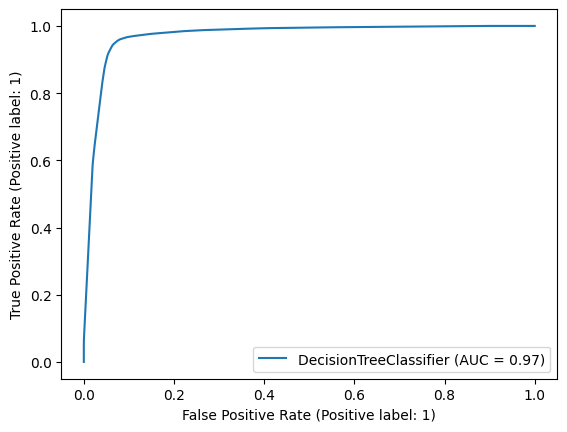

In [159]:
# Plotting ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_train, y_train)
plt.show()

### Hyperparameter tuning


In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
dt = DecisionTreeClassifier(random_state=23)

In [162]:
#  parameters

params = {
            "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
            "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
            "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

In [163]:
grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [164]:
# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [165]:
grid_search.best_score_

0.9168233626383955

In [166]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best


DecisionTreeClassifier(max_depth=20, random_state=23)

In [167]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8075
           1       0.23      0.56      0.33       472

    accuracy                           0.87      8547
   macro avg       0.60      0.73      0.63      8547
weighted avg       0.93      0.87      0.90      8547



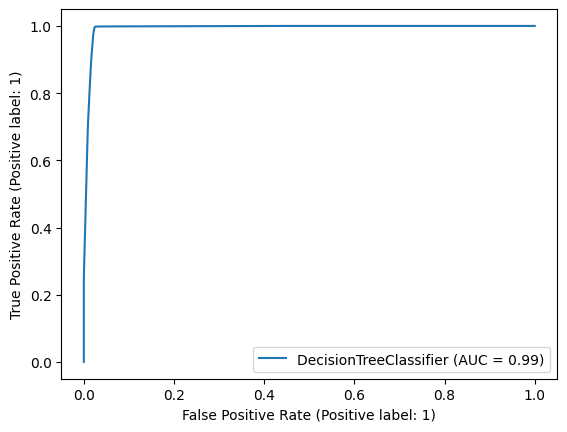

In [168]:
# Plotting ROC
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

### Decision Tree 

#### Accuracy = 0.88
#### Recall = 0.53

## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)


In [171]:
# Instantiate SMOTE
sm = SMOTE(random_state=23)

In [172]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [173]:
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=15,
                       oob_score=True, random_state=25)

In [174]:
y_train_pred = rf.predict(X_train)

In [175]:
# Train Accuracy
y_train_pred = rf.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

0.947103274559194

In [176]:
X_train_rf.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)

In [177]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)

In [178]:
X_test.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)

In [179]:
y_test_pred = rf.predict(X_test)

In [180]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8075
           1       0.34      0.67      0.45       472

    accuracy                           0.91      8547
   macro avg       0.66      0.80      0.70      8547
weighted avg       0.94      0.91      0.92      8547



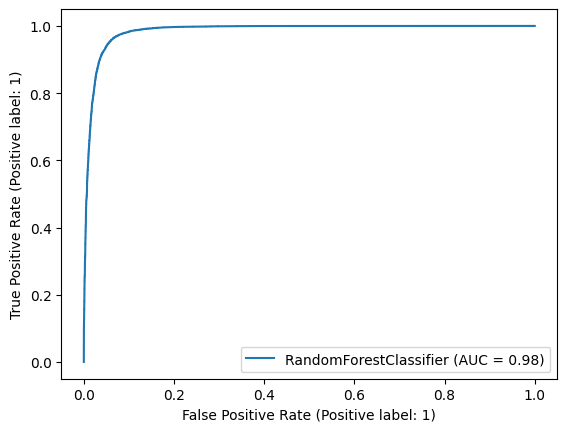

In [181]:
# Plotting ROC
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### Random Forest
#### Accuracy = 0.91
#### Recall = 0.67

## Conclusion :

### We will use simple model, Logistic regression as it has better recall (0.7)& acceptable accuracy (0.82) & for better business understanding

As discovered during Exploratory Data analysis, the reduction in the following items can indicate the possibility of churn

* Minutes of Usage
* Data Usage in MB
* Recharge Amount
* Number of Recharges
* Average Revenue per user

The similar observation can be made after looking at the top 10 model parameters

total_ic_mou_8          -->    1.055350 </br>
monthly_3g_8            -->   0.702145 </br>
loc_og_t2t_mou_8        -->   0.633161 </br>
last_day_rch_amt_8      -->   0.619815 </br>
sep_vbc_3g              -->   0.548365 </br>
roam_og_mou_8           -->   0.535675 </br>
total_rech_num_8        -->   0.531826 </br>
monthly_2g_8            -->   0.518164 </br>
vol_3g_mb_6             -->   0.517060 </br>
total_og_mou_7          -->   0.465544 

Actions:

1. The behaviour of customers to be monitored during action phase especially during 8th month for reduction in minutes of usage
2. Those customers who have not used mobile data during both phases need be be observed for other signs
3. Those customers who have not made any recharges specifically during action phase can be potential churners

